<a href="https://colab.research.google.com/github/shashwat-dubey/ML/blob/master/KerasTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow import keras as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [0]:
(X_train, Y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("X_train.shape : " + str(X_train.shape))
print("Y_train.shape : " + str(Y_train.shape))
print("x_test.shape  : " + str(x_test.shape))
print("y_test.shape  : " + str(y_test.shape))

X_train.shape : (60000, 28, 28)
Y_train.shape : (60000,)
x_test.shape  : (10000, 28, 28)
y_test.shape  : (10000,)


7


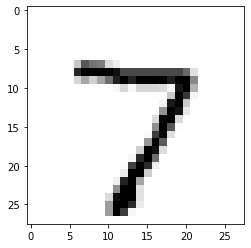

In [4]:
plt.imshow(x_test[0], cmap='Greys')
print(y_test[0])

## Preprocessing the input data
1. Reshape the train & test data.
>
    * From mnist database the X_train data has come in (60000 * 28 * 28) 3D array format, convert to (60000, 28 * 28) 2D array.
    * From mnist database the X_test  data has come in (10000 * 28 * 28) 3D array format, convert to (10000, 28 * 28) 2D array.
2. Convert datatype to float32.
3. Devide by 255, so that every sample lies between [0, 1]

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)     # Alternatively, X_train.reshape(60000, 28*28) or X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
x_test  = x_test.reshape (x_test.shape[0] , -1)
print("New X_train.shape : " + str(X_train.shape))
print("New x_test.shape  : " + str(x_test.shape))
print("\n\n\n X_train[0] before float conversion & devision by 255:\n")
print(X_train[0])

X_train = X_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0


print("\n\n\n X_train[0] after float conversion & devision by 255:\n")
print(X_train[0])

New X_train.shape : (60000, 784)
New x_test.shape  : (10000, 784)



 X_train[0] before float conversion & devision by 255:

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82

## Preprocess the Output:
1. Use to_categorical function to convert 1D array into array of N Class bins.
2. to_categorical function finds out number of classes (N) in provided input array and adds another dimension of size [N] to input.
3. Our output consists of 10 Classes (0-9 digits), therefore new shape becomes (60000, 10). Also, binning is implemented.
4. Binning example for class N = 3:
> [1, 0, 0]
> [0, 1, 0]
> [0, 0, 1]


In [6]:
print("Initial Y_train.shape : " + str(Y_train.shape))
print("Initial Y_train[0] : "    + str(Y_train[0]))
#Y_train = to_categorical(Y_train, num_classes=10)
Y_train = to_categorical(Y_train)
y_test  = to_categorical(y_test)
print("After to_categorical call, Y_train.shape : " + str(Y_train.shape))
print("After to_categorical call, Y_train[0] : "    + str(Y_train[0]))

Initial Y_train.shape : (60000,)
Initial Y_train[0] : 5
After to_categorical call, Y_train.shape : (60000, 10)
After to_categorical call, Y_train[0] : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Build the Model:
1. Input Layer: 784 inputs (1D array of 28 x 28 pixel)
2. Layer1: 512 neurons with ReLU activation fx.
3. Layer2: 512 neurons with ReLU activation fx.
4. Output Layer: 10 Neurons [0 - 9 Digits] with softmax activation fx.
5. Param# column in model.summary() output is calculated as N_input * N_Neurons + bias, where bias = N_Neurons

In [0]:
model = K.Sequential()

In [0]:
model.add(K.layers.Dense(512, activation='relu', input_shape=(784,)))

In [0]:
model.add(K.layers.Dense(512, activation='relu'))

In [0]:
model.add(K.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the Model:

In [13]:
History = model.fit(x = X_train, y = Y_train, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1834 - accuracy: 0.9439 - val_loss: 0.0986 - val_accuracy: 0.9703
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0799 - accuracy: 0.9743 - val_loss: 0.0741 - val_accuracy: 0.9766
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0559 - accuracy: 0.9820 - val_loss: 0.0739 - val_accuracy: 0.9777
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0431 - accuracy: 0.9862 - val_loss: 0.0728 - val_accuracy: 0.9805
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0334 - accuracy: 0.9896 - val_loss: 0.1001 - val_accuracy: 0.9739
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0885 - val_accuracy: 0.9787
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0883 - val_accuracy:

## Evaluate the fitting

{'loss': [0.18336226046085358, 0.07992804050445557, 0.05587522312998772, 0.043072909116744995, 0.033424973487854004, 0.03061043843626976, 0.024329815059900284, 0.022180095314979553, 0.021409155800938606, 0.01692449487745762, 0.017535382881760597, 0.016979513689875603, 0.016336670145392418, 0.012864528223872185, 0.011781441979110241, 0.015896404162049294, 0.012881988659501076, 0.01474220771342516, 0.012345054186880589, 0.012576918117702007], 'accuracy': [0.9439166784286499, 0.9743333458900452, 0.9819833040237427, 0.9862333536148071, 0.9896166920661926, 0.9905333518981934, 0.9923333525657654, 0.993149995803833, 0.9934499859809875, 0.9946333169937134, 0.9950166940689087, 0.9952999949455261, 0.9951833486557007, 0.9964500069618225, 0.9963666796684265, 0.9955166578292847, 0.996233344078064, 0.9966166615486145, 0.9968000054359436, 0.9968500137329102], 'val_loss': [0.09857083857059479, 0.07412159442901611, 0.07393311709165573, 0.07280535250902176, 0.10008556395769119, 0.08853170275688171, 0.08

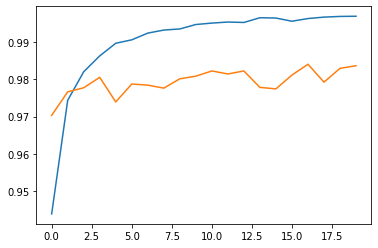

In [16]:
print(History.history)

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])